# Desafío 3: kNN Vecinos 

## Aplicamos el modelo `KNeighborsClassifier` de `scikit-learn` a los datos de intenciones de compras en línea.

## 1. Introducción

**Información del DataSet:**

El dataset consiste en vectores de características que pertenecen a 12330 sesiones. 
El conjunto de datos se conformó de manera que cada sesión pertenezca a un usuario diferente en un período de 1 año para evitar cualquier tendencia a una campaña específica, día especial, perfil de usuario o período. 

El conjunto de datos original consta de 10 atributos numéricos y 8 atributos categóricos. 
El atributo *'Revenue'* (Ingresos) se utiliza como etiqueta de clasificación. 

*"Administrative"* (Administrativa), *"Administrative Duration"* (Duración administrativa), *"Informational"* (Informativa), *"Informational Duration"* (Duración informativa), *"Product Related"* (Producto relacionado) y *"Product Related Duration"* (Duración producto relacionado) representan el número de diferentes tipos de páginas visitadas por el visitante en esa sesión y el tiempo total invertido en cada una de estas categorías de páginas. Los valores de estas funciones se derivan de la información de URL de las páginas visitadas por el usuario y se actualizan en tiempo real cuando un usuario realiza una acción, por ejemplo: pasar de una página a otra. 

*Respecto a Google Analytics:*
Las características *"Bounce Rate"* (Tasa de rebote), *"Exit Rate"* (Tasa de salida) y ***"Page Value"* (Valor de la página)** representan las métricas medidas por "Google Analytics" para cada página en el sitio de comercio electrónico. El valor de la función "Índice de rebote" para una página web se refiere al porcentaje de visitantes que ingresan al sitio desde esa página y luego se van ("rebote") sin activar ninguna otra solicitud al servidor de análisis durante esa sesión. El valor de la columna "Tasa de salida" para una página web específica se calcula como el porcentaje del total de páginas en cada página fue la última en ser visitada en la sesión. La característica **"Valor de página"** representa el valor promedio de una página web que un usuario visitó antes de completar una transacción de comercio electrónico. 

*Otras características:*
La función "Día especial" indica la proximidad del tiempo de visita del sitio a un día especial específico (por ejemplo, el Día de la Madre, el Día de San Valentín) en el que es más probable que las sesiones finalicen con la compra. El valor de este atributo se determina considerando la dinámica del comercio electrónico, como la duración entre la fecha del pedido y la fecha de entrega. Por ejemplo, para el día de San Valentín, este valor toma un valor distinto de cero entre el 2 de febrero y el 12 de febrero, cero antes y después de esta fecha a menos que esté cerca de otro día especial, y su valor máximo de 1 el 8 de febrero. El conjunto de datos también incluye sistema operativo, navegador, región, tipo de tráfico, tipo de visitante como visitante recurrente o nuevo, un valor booleano que indica si la fecha de la visita es el fin de semana y el mes del año.

*Fuente: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset*


In [0]:
# en Anaconda: comentar esta celda
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# para Anaconda:
path = ''

# para Cristian en Colab:
path='gdrive/My Drive/DataScience - DH/Desafio3/'



---



---



## kNN *Vecinos* con `sklearn`

Aplicamos sobre los datos de test, la transformación para estandarizar valores, de igual manera que en train, para mantener la consistencia de tipos de datos.

In [0]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
pd.options.display.max_rows = 100
pd.set_option("display.max_rows", 101)

In [0]:
df = pd.read_pickle('{}online_shoppers_intention_dummies.pkl'.format(path))

In [0]:
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Revenue,New_Visitor,Returning_Visitor,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,0,1,1


In [0]:
print(df.loc[df['Revenue'] == True].shape)
display(df.loc[df['Revenue'] == True].head())

(1908, 19)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Revenue,New_Visitor,Returning_Visitor,Weekend_True
65,3,87.833333,0,0.0,27,798.333333,0.000000,0.012644,22.916036,0.8,2,2,2,3,1,1,0,1,0
76,10,1005.666667,0,0.0,36,2111.341667,0.004348,0.014493,11.439412,0.0,2,2,6,1,2,1,0,1,0
101,4,61.000000,0,0.0,19,607.000000,0.000000,0.026984,17.535959,1.0,2,1,1,7,4,1,0,1,1
188,9,111.500000,1,48.5,49,1868.819697,0.000000,0.020709,1.706015,0.0,3,2,2,7,2,1,0,1,0
196,2,56.000000,1,144.0,67,2563.783333,0.000000,0.005797,19.342650,0.0,3,2,2,4,2,1,1,0,0


#### Armamos las matrices X e y 

In [0]:
# Probamos con KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing

In [0]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Revenue',
       'New_Visitor', 'Returning_Visitor', 'Weekend_True'],
      dtype='object')

In [0]:
X = df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 
       'New_Visitor', 'Returning_Visitor', 'Weekend_True']]
y = df["Revenue"]

In [0]:
X.shape

(12330, 18)

### Aplicamos el modelo `KNeighborsClassifier` 

con validación cruzada para distintos hiperparámetros de `n_neighbors`

In [0]:
from sklearn.model_selection import cross_val_score

# Voy a querer graficar los distintos valores del score de cross validation en función del hiperparámetro n_neighbors

#Lista de Diccionarios
scores_para_df = []

# range(1,40,5) son los posibles valores de n_neighbors que quiero explorar. Son todos los enteros desde el 1
# hasta el 40 en saltos de a 5. (Start,Stop,Step)
for i in range(1,100,5):
    # En cada iteración instanciamos el modelo con un hiperparámetro distinto
    model = KNeighborsClassifier(n_neighbors=i)
    
    # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV  
    cv_scores = cross_val_score(model, X, y, cv=5)
    
    # Para cada valor de n_neighbours, creo un diccionario con el valor de n_neighbours y la media y el desvío de los scores.
    dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}
    
    # Guardo cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [0]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_scores = pd.DataFrame(scores_para_df)
df_scores.head()

,n_neighbours,score_medio,score_std
0,1,0.825701,0.023374
1,6,0.863744,0.010345
2,11,0.864231,0.009450
3,16,0.864556,0.007382
4,21,0.862042,0.005461


In [0]:
df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
df_scores.sort_values('score_medio', ascending=False)

,n_neighbours,score_medio,score_std,limite_inferior,limite_superior
3,16,0.864556,0.007382,0.857174,0.871938
2,11,0.864231,0.009450,0.854781,0.873681
1,6,0.863744,0.010345,0.853399,0.874088
4,21,0.862042,0.005461,0.856581,0.867504
5,26,0.861150,0.005004,0.856146,0.866155
6,31,0.859690,0.004931,0.854759,0.864622
7,36,0.858150,0.004830,0.853320,0.862980
8,41,0.856852,0.003348,0.853504,0.860201
9,46,0.855231,0.003146,0.852084,0.858377
10,51,0.854501,0.002512,0.851989,0.857013


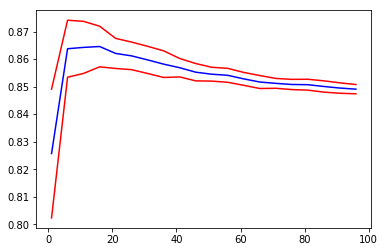

In [0]:
plt.plot(df_scores['n_neighbours'],df_scores['limite_inferior'],color='r')
plt.plot(df_scores['n_neighbours'],df_scores['score_medio'],color='b')
plt.plot(df_scores['n_neighbours'],df_scores['limite_superior'],color='r');

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
le = preprocessing.LabelEncoder()
y =  le.fit_transform(df['Revenue'])

In [0]:
# Elegimos el modelo óptimo que nos había indicado cross validation
model = KNeighborsClassifier(n_neighbors=16)
# Lo ajustamos sobre datos de entrenamiento
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [0]:
# Lo utilizamos para predecir en test
y_pred = model.predict(X_test)

0.8753993610223643


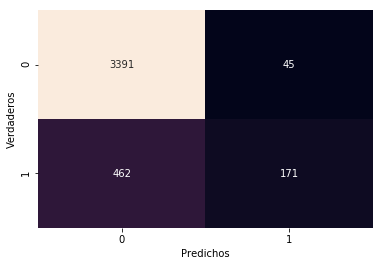

In [0]:
# Matriz de confusión
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cbar=False)
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');
print(accuracy_score(y_test, y_pred))

In [0]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[3391   45]
 [ 462  171]]


In [0]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [0]:
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, y_pred))

0.8753993610223643
0.8753993610223643


In [0]:
class_error = (FP + FN) / float(TP + TN + FP + FN)

print(class_error)
print(1 - accuracy_score(y_test, y_pred))

0.12460063897763578
0.12460063897763574


In [0]:
from sklearn.metrics import recall_score
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(recall_score(y_test, y_pred))

0.27014218009478674
0.27014218009478674


In [0]:
specificity = TN / (TN + FP)

print(specificity)

0.9869033760186263


In [0]:
from sklearn.metrics import precision_score

precision = TP / float(TP + FP)

print(precision)
print(precision_score(y_test, y_pred))

0.7916666666666666
0.7916666666666666


#### Métricas computadas desde la matriz de confusión: F1-Score

Es un promedio armónico entre precision y recall.

In [0]:
from sklearn.metrics import f1_score

# f1 = 2*((precision*sensitivity)/(precision+sensitivity))
print('F1 score = {}'.format(f1_score(y_test,y_pred)))

F1 score = 0.4028268551236749


In [0]:
from sklearn.metrics import roc_auc_score, classification_report

In [0]:
roc_auc_score(y_test, y_pred)

0.6285227780567065

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      3436
           1       0.79      0.27      0.40       633

    accuracy                           0.88      4069
   macro avg       0.84      0.63      0.67      4069
weighted avg       0.87      0.88      0.85      4069



kNN (área = 0.63)


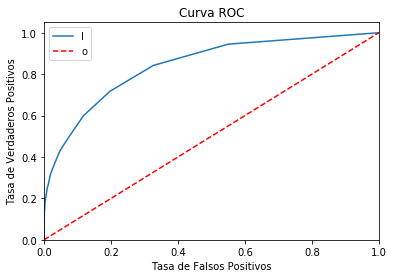

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])


print('kNN (área = %0.2f)' % logit_roc_auc)

plt.figure()
plt.plot(fpr, tpr, label='kNN (área = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC'+' kNN (área = %0.2f)' % logit_roc_auc)
plt.legend("lower right")
plt.savefig("{}kNN_ROC.png".format(path), dpi=400)
plt.show()